## Tổng quan

Phân tích chuỗi thời gian là một cách cụ thể để phân tích một chuỗi các điểm dữ liệu được thu thập trong một khoảng thời gian. Trong phân tích chuỗi thời gian, các nhà phân tích ghi lại các điểm dữ liệu theo các khoảng thời nhất định thay vì chỉ ghi các điểm dữ liệu một cách gián đoạn hoặc ngẫu nhiên.

Tuy nhiên, loại phân tích này không chỉ đơn thuần là hành động thu thập dữ liệu theo một trình tự thời gian. Điều khiến dữ liệu chuỗi thời gian trở nên khác biệt so với các dữ liệu khác là khi phân tích có thể cho thấy các biến thay đổi như thế nào theo thời gian. Nói cách khác, thời gian là một biến số quan trọng vì nó cho thấy dữ liệu thay đổi ra sao trong từng giai đoạn, chu kỳ. Nó cung cấp một nguồn thông tin bổ sung và một thứ tự phụ thuộc giữa các dữ liệu. Phân tích chuỗi thời gian thường yêu cầu một số lượng lớn các điểm dữ liệu để đảm bảo tính nhất quán và độ tin cậy. Tập dữ liệu mở rộng đảm bảo bạn có kích thước mẫu đại diện và phân tích có thể cắt bỏ dữ liệu nhiễu. Nó cũng đảm bảo rằng bất kỳ xu hướng hoặc mô hình nào được phát hiện không phải là ngoại lệ và có thể giải thích cho phương sai. Ngoài ra, dữ liệu chuỗi thời gian có thể được sử dụng để dự báo — dự đoán dữ liệu trong tương lai dựa trên dữ liệu lịch sử. Xem thêm https://www.tableau.com/learn/articles/time-series-analysis

Các khái niệm trong phần này rất quan trọng, chúng ta sẽ thường áp dụng trực tiếp trong mô hình giao dịch thuật toán (Algorithmic Trading). 

Phân tích dữ liệu chuỗi thời gian có thể rất hấp dẫn khi sử dụng một số kỹ thuật này trên dữ liệu tài chính, nhưng đôi khi nó không phải lý một ý kiến hay, và để hiểu được tại sao lại như vậy chúng ta cần phải hiểu các kỹ thuật của nó. Vì vậy, với một cách tiếp cận tổng thể cho phần này, bạn nên cố gắng hiểu ở mức độ cao hơn về một số khái niệm, nhưng đừng quan tâm quá nhiều đến các chi tiết (liên quan đến các phần trong tương lai của khóa học).

Nội dung của bài viết này : 
+ Giới thiệu Statsmodels
+ Time Series cơ bản 
+ Mô hình ETS Decomposition  
+ Mô hình EWMA 
+ Mô hình ARIMA 




## Giới thiệu về Statsmodels 

Trong Python, có khá nhiều thư viện, module hỗ cung cấp các thuật toán xử lý dữ liệu chuỗi thời gian có thể kể đến như `statsmodels`, `scipy` ...

Statsmodels là thư viện phổ biến nhất trong Python về thống kê dữ liệu. Nó cung cấp các class và function  để tính toán nhiều loại mô hình thống kê khác nhau, cũng như để thực hiện các thử nghiệm thống kê và thăm dò dữ liệu.

Statsmodels rất hữu ích xử lý dữ liệu chuỗi thời gian (điển hình của phân tích tài chính định lượng).








In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
print(sm.datasets.macrodata.SOURCE)


Compiled by Skipper Seabold. All data are from the Federal Reserve Bank of St.
Louis [1] except the unemployment rate which was taken from the National
Bureau of Labor Statistics [2]. ::

    [1] Data Source: FRED, Federal Reserve Economic Data, Federal Reserve Bank of
        St. Louis; http://research.stlouisfed.org/fred2/; accessed December 15,
        2009.

    [2] Data Source: Bureau of Labor Statistics, U.S. Department of Labor;
        http://www.bls.gov/data/; accessed December 15, 2009.



In [3]:
df = sm.datasets.macrodata.load_pandas().data
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [4]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

Trước tiên, chúng ta sẽ cần tạo index là chuỗi thời gian. Từ bảng dữ liệu `df` có thể thấy thời điểm dữ liệu bắt đầu là vào quý 1 năm 1959, và thời điểm kết thúc của bảng dữ liệu là quý 3 năm 2009. Bạn có thể sử dụng pandas để tạo index chuỗi thời gian như sau : 

In [5]:
idx = pd.date_range("1959Q1", "2009Q4", freq="Q")
idx

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq='Q-DEC')

hoặc có thể tạo index với statsmodels 

In [6]:
idx = pd.Index(sm.tsa.datetools.dates_from_range("1959Q1", "2009Q3"))
idx

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

In [7]:
df.index = idx 

In [8]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Biểu đồ tổng sản lượng quốc nội (GDP) của Hoa Kỳ từ quý 1 năm 1959 đến quý 3 năm 2009 : 

Text(0, 0.5, 'GDP')

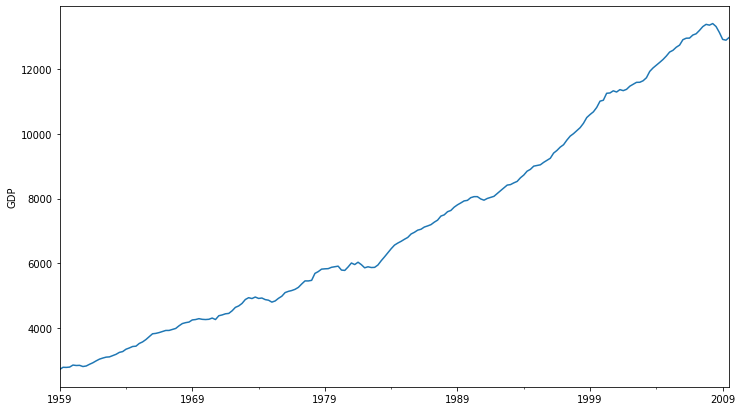

In [9]:
df["realgdp"].plot(figsize=(12,7))
plt.ylabel("GDP")

### Tìm xu hướng GDP với statsmodels

Bộ lọc Hodrick-Prescott tách chuỗi thời gian $y_t$ thành xu hướng $τ_t$ và thành phần chu kỳ $ζt$

$y_t = \tau_t + \zeta_t$

Các thành phần được xác định bằng cách giảm thiểu loss function bậc hai sau 


$\min_{\\{ \tau_{t}\\} }\sum_{t}^{T}\zeta_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$



In [10]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df["realgdp"])

In [11]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
                 ...    
2008-09-30    102.018455
2008-12-31   -107.269472
2009-03-31   -349.047706
2009-06-30   -397.557073
2009-09-30   -333.115243
Name: realgdp, Length: 203, dtype: float64

In [12]:
gdp_trend

1959-03-31     2670.837085
1959-06-30     2698.712468
1959-09-30     2726.612545
1959-12-31     2754.612067
1960-03-31     2782.816333
                  ...     
2008-09-30    13222.581545
2008-12-31    13249.189472
2009-03-31    13274.457706
2009-06-30    13299.061073
2009-09-30    13323.456243
Name: realgdp, Length: 203, dtype: float64

In [13]:
df["trend"] = gdp_trend

Text(0.5, 1.0, 'Biểu đồ xu hướng gdp so với thực tế')

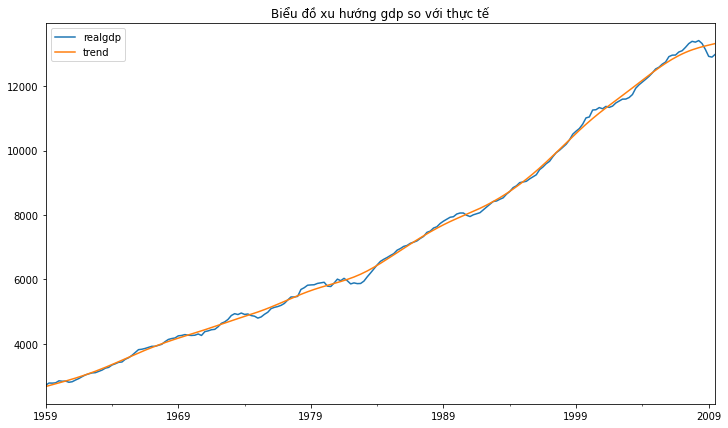

In [14]:
df[["realgdp","trend"]].plot(figsize=(12,7))
plt.title("Biểu đồ xu hướng gdp so với thực tế")

Từ 1959 là thời điểm đã cách quá xa so với hiện tại, chúng ta cần dữ liệu lịch sử trong vòng 20 năm trở lại là đủ : 

Text(0.5, 1.0, 'Biểu đồ xu hướng GDP so với thực tế từ năm 2000')

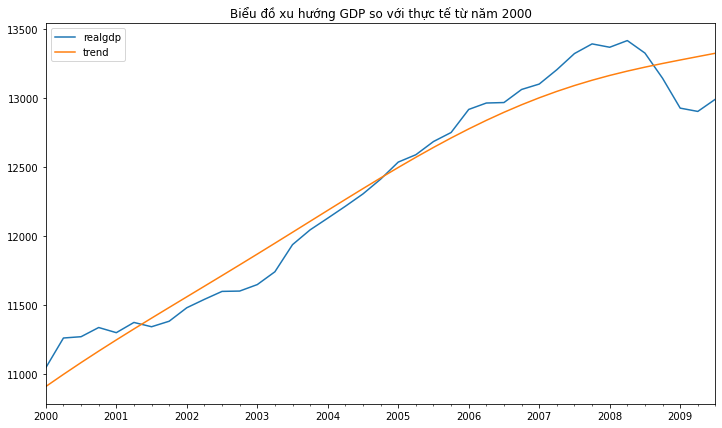

In [15]:
df.loc["2000":, ["realgdp", "trend"]].plot(figsize=(12,7))
plt.title("Biểu đồ xu hướng GDP so với thực tế từ năm 2000")

## Time Series cơ bản 




### Mục đích sử dụng dữ liệu chuỗi thời gian

Các ngành như tài chính, bán lẻ và kinh tế thường sử dụng phân tích chuỗi thời gian vì tiền tệ và doanh số luôn thay đổi. Phân tích thị trường chứng khoán là một ví dụ tuyệt vời về phân tích chuỗi thời gian trong thực tế, đặc biệt là với các thuật toán giao dịch tự động. Tương tự như vậy, phân tích chuỗi thời gian là lý tưởng để dự báo thay đổi thời tiết, giúp các nhà khí tượng học dự đoán mọi thứ từ báo cáo thời tiết ngày mai cho đến những năm biến đổi khí hậu trong tương lai. Ví dụ về phân tích chuỗi thời gian trong thực tế bao gồm:
+ Dự báo thời tiết 
+ Đo lường lượng mưa 
+ Đo lường nhiệt độ
+ Theo dõi nhịp tim (EKG)
+ Theo dõi não bộ (EEG)
+ Doanh số theo tháng / quý / năm
+ Giá cổ phiếu 
+ Giá trị tiền điện tử (crypto) 
+ Giao dịch chứng khoán tự động
+ Theo dõi lãi suất

Bởi vì phân tích chuỗi thời gian bao gồm nhiều danh mục hoặc các biến thể của dữ liệu, các nhà phân tích đôi khi phải đưa ra các mô hình phức tạp. Tuy nhiên, các nhà phân tích không thể giải thích tất cả các phương sai và họ không thể khái quát một mô hình cụ thể cho mọi mẫu dữ liệu do mô hình quá phức tạp hoặc cố gắng làm quá nhiều việc có thể dẫn đến thiếu phù hợp. Các mô hình thiếu phù hợp hoặc phức tạp quá mức dẫn đến các mô hình đó không phân biệt được mối quan hệ giữa sai số ngẫu nhiên, khiến phân tích bị sai lệch và dự báo không chính xác.



### Phân loại 


Mặc dù dữ liệu chuỗi thời gian là dữ liệu được thu thập theo thời gian, nhưng có nhiều loại dữ liệu khác nhau mô tả cách thức và thời điểm dữ liệu thời gian đó được ghi lại. Ví dụ:

+ Dữ liệu được ghi lại trong những khoảng thời gian nhất quán.
+ Dữ liệu cắt ngang bao gồm một số biến được ghi cùng một lúc.
+ Dữ liệu gộp là sự kết hợp của cả dữ liệu chuỗi thời gian và dữ liệu cắt ngang.

Hơn nữa, dữ liệu chuỗi thời gian có thể được phân loại thành hai loại chính:

Dữ liệu chuỗi thời gian có các thuộc tính cụ thể như sau : 

+ Dữ liệu theo xu hướng (Trend)

![trend data](https://miro.medium.com/max/1838/1*lmK4zwDN3AwyD8190xIdng.png)

+ Dữ liệu theo mùa - xu hướng lặp đi lặp lại :  Mô hình theo mùa tồn tại khi một chuỗi bị ảnh hưởng bởi các yếu tố theo mùa (ví dụ: quý trong năm, tháng hoặc ngày trong tuần). Tính thời vụ luôn tính dừng và được biết trước. Do đó, chuỗi thời gian theo mùa đôi khi được gọi là chuỗi thời gian tuần hoàn.

![seasonal data](https://robjhyndman.com/hyndsight/2011-12-14-cyclicts_files/figure-html/unnamed-chunk-1-1.png) 

+ Dữ liệu tuần hoàn - Xu hướng không có sự lặp lại : 
Mô hình tuần hoàn tồn tại khi dữ liệu thể hiện tăng và giảm không theo chu kỳ có . Thời gian của những biến động này thường ít nhất là 2 năm. Giả sử các chu kỳ kinh doanh thường kéo dài vài năm, nhưng chưa biết trước độ dài của chu kỳ hiện tại là bao nhiêu.

![cyclical data](https://robjhyndman.com/hyndsight/2011-12-14-cyclicts_files/figure-html/unnamed-chunk-2-1.png)




### Các loại phân tích chuỗi thời gian 

+ **Phân loại** : Xác định và gán các danh mục cho dữ liệu.
+ **Curves Fitting** : Vẽ đồ thị dữ liệu dọc theo một đường cong để nghiên cứu mối quan hệ của các biến trong dữ liệu.
+ **Phân tích mô tả** : xác định các mẫu trong dữ liệu chuỗi thời gian, như xu hướng, chu kỳ hoặc biến thể theo mùa.
+ **Phân tích giải thích** : Cố gắng hiểu dữ liệu và các mối quan hệ bên trong nó, cũng như nguyên nhân và kết quả.
+ **Phân tích thăm dò** : Làm nổi bật các đặc điểm chính của dữ liệu chuỗi thời gian, thường ở định dạng trực quan.
+ **Dự báo** : Dự đoán dữ liệu trong tương lai dựa trên xu hướng lịch sử. 
+ **Phân tích can thiệp** : Nghiên cứu cách một sự kiện có thể thay đổi dữ liệu
+ **Phân đoạn** : Tách dữ liệu thành các phân đoạn để hiển thị các thuộc tính cơ bản của thông tin nguồn.







## Mô hình ETS Decomposition 

Mô hình ETS (Error Trend Seasonality) : là một phương pháp dự báo đơn biến theo chuỗi thời gian; việc sử dụng nó tập trung vào xu hướng và các thành phần theo mùa. Các mô hình của ETS gồm : 
+ Exponential Smoothing (làm mịn theo cấp số nhân)
+ Các mô hình áp dụng phương pháp xu hướng
+ ETS Decomposition

Trực quan hóa dữ liệu dựa trên ETS là một cách tốt để có thể hiểu rõ về hành vi của nó.

![image](https://i.stack.imgur.com/I5bJM.png)


Chúng ta sẽ tìm hiểu các mô hình trong ETS với tập dữ liệu ghi lại số lượng hành khách của một hãng bay theo từng tháng:




In [16]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2021-10-03 17:02:05--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2021-10-03 17:02:06 (36.8 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



In [17]:
airline = pd.read_csv("airline-passengers.csv",parse_dates=True, index_col=["Month"])

In [18]:
airline

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


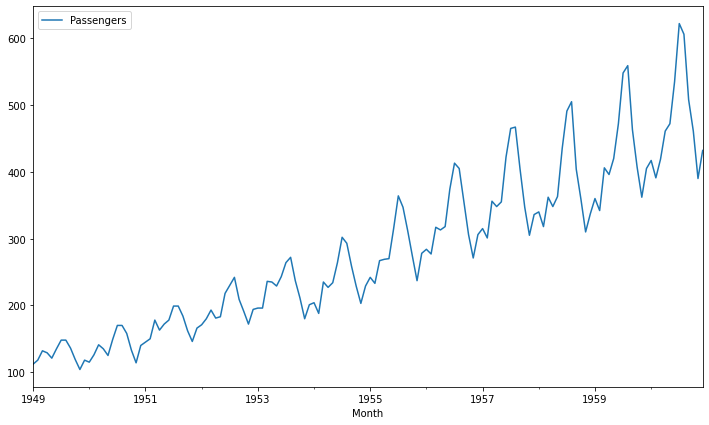

In [19]:
airline.plot(figsize=(12,7))

Chúng ta có thể sử dụng mô hình cộng dữ liệu nếu biểu đồ xu hướng tuyến tính và các thành phần thời vụ và xu hướng dường như không đổi theo thời gian (ví dụ: mỗi năm chúng ta thêm 10.000 hành khách). Mô hình số nhân phù hợp hơn khi chúng ta tăng (hoặc giảm) với tốc độ phi tuyến tính (ví dụ: mỗi năm chúng tôi tăng gấp đôi lượng hành khách).

Dựa trên biểu đồ này, có vẻ như xu hướng trong những thời điểm sau đó đang tăng nhẹ với tốc độ cao hơn chỉ là tuyến tính (mặc dù hơi khó nhận biết từ một biểu đồ này).





In [20]:
#Kiểm tra dữ liệu có bị bỏ sót hay không (nếu False là không, nếu True thì cần bỏ dòng đó đi)
airline.isna().any()

Passengers    False
dtype: bool

Sử dụng phương phân phân tích phân tách ETS (ETS Decomposition)

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline["Passengers"],model="multiplicative")

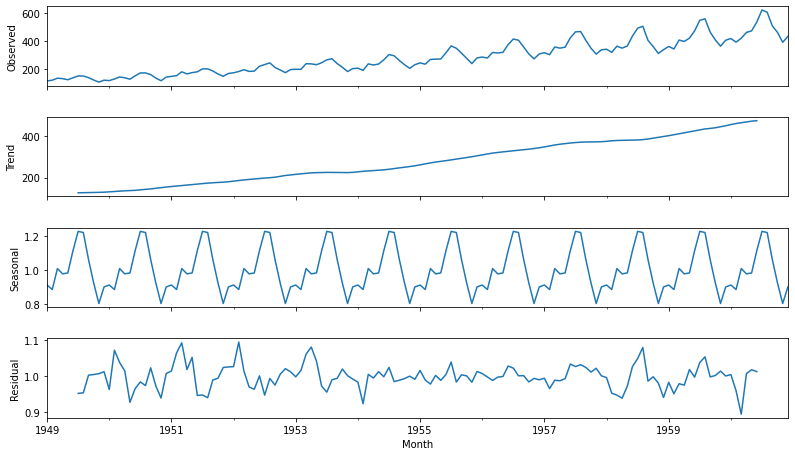

In [22]:
fig = result.plot()
fig.set_size_inches(12,7)

## Mô hình EWMA 

Trước đây, bạn đã thấy cách tính toán các đường trung bình động đơn giản (SMA) có thể cho phép chúng ta tạo một mô hình đơn giản mô tả một số hành vi ở mức xu hướng của một chuỗi thời gian. Tuy nhiên, nó có một số điểm yếu : 
+ Khoảng thời gian càng nhỏ dẫn đến độ nhiễu càng lớn hơn là tín hiệu 
+ Nó sẽ luôn bị trễ bởi kích thước của khoảng thời gian 
+ Nó sẽ không bao giờ đạt đến đỉnh hoặc đáy đầy đủ của dữ liệu do tính trung bình.
+ Không thực sự thông báo cho bạn về hành vi có thể xảy ra trong tương lai, tất cả những gì nó thực sự làm là mô tả xu hướng trong dữ liệu.
+ Giá trị lịch sử nghiêm ngặt có thể làm sai lệch đáng kể SMA của bạn

![](https://images.ctfassets.net/tln063yrioga/4JfmjurQjKo4iLNxkoe86k/e64f5043db7d392eb9fd8357fb40f47e/download.png?h=250)


Trước tiên, chúng ta sẽ sử dụng SMA :







### SMA

In [23]:
airline["6-month-SMA"] = airline["Passengers"].rolling(6).mean()
airline["12-month-SMA"] = airline["Passengers"].rolling(12).mean()

In [24]:
airline

,Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
...,...,...,...
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333


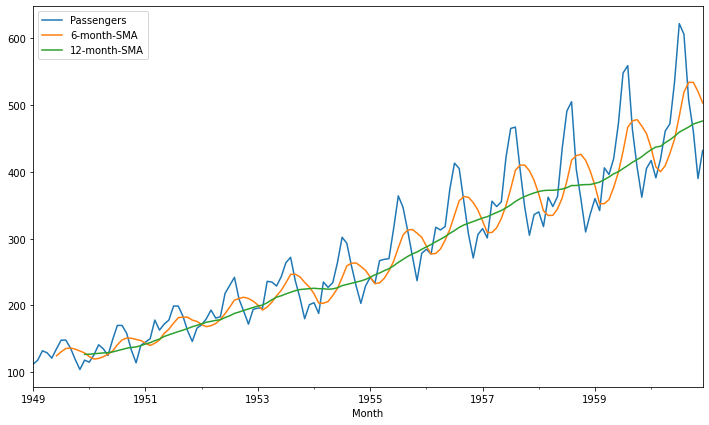

In [25]:
airline.plot(figsize=(12,7))

### EWMA 

EWMA sẽ cho phép chúng ta giảm hiệu ứng trễ từ SMA và nó sẽ đặt nhiều trọng số hơn vào các giá trị xuất hiện gần đây hơn (bằng cách áp dụng nhiều trọng số hơn cho các giá trị gần đây hơn, do đó là tên). Lượng trọng số được áp dụng cho các giá trị gần đây nhất sẽ phụ thuộc vào các thông số thực tế được sử dụng trong EWMA và số khoảng thời gian cho một kích thước của khoảng thời gian trễ. Chi tiết đầy đủ về Toán học đằng sau điều này có thể được tìm thấy ở đây Đây là phiên bản ngắn hơn của lời giải thích đằng sau EWMA.

$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i} $

với : 
+ $x_{t-i}$ : giá trị đầu vào ở thời điểm t-i
+ $w_i$ : trọng số được áp dụng tại thời điểm i
+ $y_t$ : Giá trị xuất ra 

Bây giờ câu hỏi là, làm thế nào để chúng ta xác định thuật ngữ trọng lượng $w_i$?

Điều này phụ thuộc vào tham số điều chỉnh mà bạn cung cấp cho phương thức `.ewm()`.

Khi `adjust=True` (mặc định), giá trị trung bình có trọng số được tính bằng cách sử dụng các trọng số:


$y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

Khi `adjust=False`, các đường trung bình động được tính như sau:

$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

tương đương với việc sử dụng trọng số:


\begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{nếu } i < t \\
    (1 - \alpha)^i        & \text{nếu } i = t.
\end{cases}\end{split}


Khi `adjust=True` chúng ta có $y_0 = x_0$ và từ biểu diễn cuối cùng ở trên, chúng ta có $y_t = αx_t + (1 − α)y_t − 1$, do đó có giả thiết rằng $x_0$ không phải là một giá trị bình thường mà là một mômen có trọng số mũ của vô hạn loạt cho đến thời điểm đó.

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{với span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{với center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{với half-life}\ h > 0
 \end{cases}\end{split}

+ `s` được gọi là "đường trung bình động EW trong N ngày"
+ `c` : Khối lượng tâm có cách giải thích vật lý hơn và có thể được coi là theo khoảng $c = (s-1) / 2$
+ `h` : Chu kỳ bán rã là khoảng thời gian để trọng số theo cấp số nhân giảm xuống còn một nửa.
+ `α` : chỉ định trực tiếp hệ số làm mịn.








In [26]:
airline["EWMA12"] = airline["Passengers"].ewm(span=12).mean()

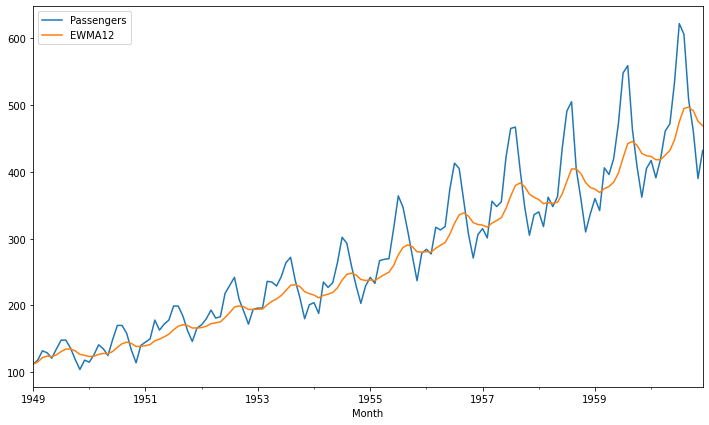

In [27]:
airline[["Passengers", "EWMA12"]].plot(figsize=(12,7))

## Mô hình ARIMA

ARIMA (Auto regressive intergrated moving average) Mô hình Đường trung bình động được tích hợp tự động hồi quy là một sự khái quát của mô hình đường trung bình động tự động hồi quy (ARMA). Nhưng vì nhiều lý do khác nhau mà chúng ta sẽ khám phá sau này, các mô hình ARIMA thường không hoạt động tốt với dữ liệu cổ phiếu lịch sử. Tuy nhiên, chúng là nền tảng phục vụ cho phân tích chuỗi thời gian nên vẫn đáng để xem qua.

Cả hai mô hình (ARIMA và ARMA) được điều chỉnh sao cho phù hợp với dữ liệu chuỗi thời gian để hiểu rõ hơn về dữ liệu hoặc dự đoán các điểm trong tương lai. 

ARIMA được chia làm 2 loại : 
+ ARIMA không theo mùa 
+ ARIMA theo mùa

Mô hình ARIMA được áp dụng trong một số trường hợp khi dữ liệu cho thấy bằng chứng về tính không ổn định, trong đó bước khác biệt ban đầu (tương ứng với phần "tích hợp" của mô hình) có thể được áp dụng một hoặc nhiều lần để loại bỏ tính không ổn định.

Mô hình ARIMA không theo mùa thường được ký hiệu ARIMA(p,d,q) với 3 tham số là những số nguyên dương. Các thành phần chính của mô hình ARIMA : 
+ AR (p) : Mô hình hồi quy sử dụng mối quan hệ phụ thuộc giữa quan sát hiện tại và quan sát trong khoảng thời gian trước đó. 
+ I (d) : Sự khác biệt của các quan sát (lấy một quan sát trừ đi một quan sát ở bước thời gian trước đó) để làm cho chuỗi thời gian có tính dừng. (Mô hình **ARMA** sẽ không có thuộc tính này)
+ MA (q) : Một mô hình sử dụng sự phụ thuộc giữa một quan sát và sai số dư từ một mô hình trung bình động được áp dụng cho các quan sát có độ trễ.

Dữ liệu có tính dừng so với dữ liệu không có tính dừng : 

+ Để sử dụng hiệu quả ARIMA, chúng ta cần tính ổn định trong dữ liệu.
+ Dữ liệu có tính dừng có giá trị trung bình và phương sai không đổi theo thời gian.
+ Tập dữ liệu có tính dừng sẽ cho phép mô hình dự đoán giá trị trung bình và phương sai sẽ giống nhau trong các giai đoạn trong tương lai.
+ Giá trị trung bình cần bất biến

![](https://nqousmug9v-flywheel.netdna-ssl.com/wp-content/uploads/2018/12/2_graph.png)

Ngoài ra còn có một số phương pháp kiểm định bằng toán học mà bạn có thể sử dụng để kiểm tra tính ổn định trong dữ liệu của mình. Một phương pháp kiểm định được sử dụng phổ biến là kiểm định **Augmented Dickey-Fuller**. 

Nếu dữ liệu được xác định là không ổn định (sử dụng toán học hoặc quan sát trên biểu đồ), bạn cần chuyển đổi nó thành dữ liệu có tính dừng để  thực hiện đánh giá. VD : 


|Time | Data |
| --- | ---- | 
| Time 1| 10 | 
| Time 2| 12 | 
| Time 3| 8 | 
| Time 4| 14 | 
| Time 5| 7 | 

Mức chênh lệch lần 1 : 

|Time | Data |
| --- | ---- | 
| Time 1| NaN | 
| Time 2| 2 | 
| Time 3| -4 | 
| Time 4| 6 | 
| Time 5| -7 | 

Mức chênh lệch lần 2:  

|Time | Data |
| --- | ---- | 
| Time 1| NaN | 
| Time 2| NaN | 
| Time 3| -6 | 
| Time 4| 10 | 
| Time 5| -13 | 


Bạn có thể tiếp tục so sánh cho đến khi dữ liệu đạt được tính dừng (bạn có thể kiểm tra trực quan hoặc bằng toán học). Mỗi bước khác biệt đi kèm với cái giá phải trả là mất một hàng dữ liệu.

Đối với dữ liệu theo mùa, bạn cũng có thể chênh lệch theo mùa. Ví dụ: nếu bạn có dữ liệu hàng tháng với tính thời vụ hàng năm, bạn có thể để sự chênh lêch đơn vị thời gian là 12, thay vì chỉ 1.

Một kỹ thuật phổ biến khác với các mô hình ARIMA theo mùa là kết hợp cả hai phương pháp, lấy hiệu số theo mùa của sự khác biệt đầu tiên.
 







In [28]:
!wget https://gist.githubusercontent.com/mthang1801/d4e7c4b04b43a0e75cd53e34cbc5c84e/raw/571f3117b7134ed656ddbbebd19bb3e7673e3c2a/Monthly%2520milk%2520production%2520pounds%2520per%2520cow

--2021-10-03 17:02:07--  https://gist.githubusercontent.com/mthang1801/d4e7c4b04b43a0e75cd53e34cbc5c84e/raw/571f3117b7134ed656ddbbebd19bb3e7673e3c2a/Monthly%2520milk%2520production%2520pounds%2520per%2520cow
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2371 (2.3K) [text/plain]
Saving to: ‘Monthly milk production pounds per cow’

Monthly milk produc 100%[===================>]   2.32K  --.-KB/s    in 0s      

2021-10-03 17:02:08 (47.4 MB/s) - ‘Monthly milk production pounds per cow’ saved [2371/2371]



In [29]:
milk_df = pd.read_csv("/content/Monthly milk production pounds per cow", parse_dates=True, index_col="Month")
milk_df

,pound
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [30]:
milk_df["12-month-rolling-std"] = milk_df["pound"].rolling(12).std()
milk_df["12-month-rolling-mean"] = milk_df["pound"].rolling(12).mean()

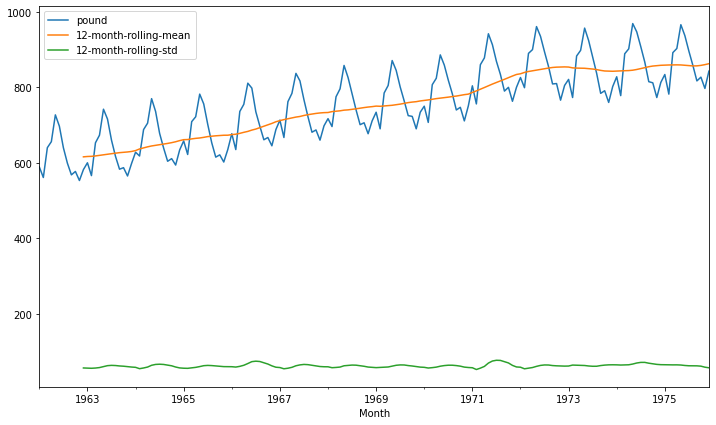

In [31]:
milk_df[["pound", "12-month-rolling-mean", "12-month-rolling-std"]].plot(figsize=(12,7))

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

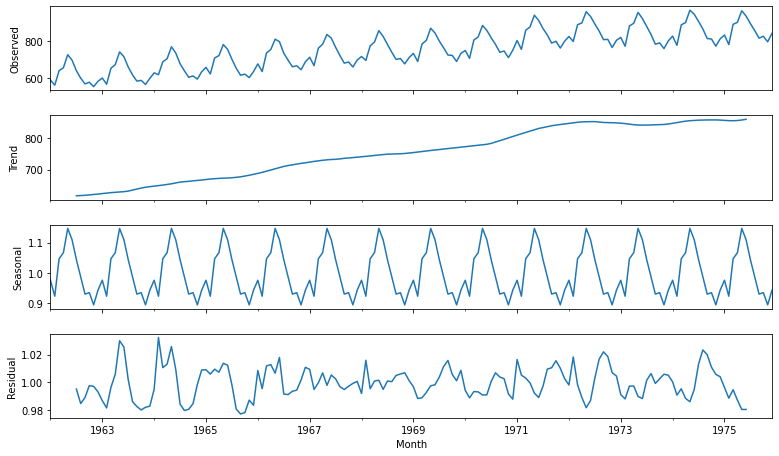

In [33]:
decomposition = seasonal_decompose(milk_df["pound"],model="multiplicative")
fig = decomposition.plot()
fig.set_size_inches(12,7)

### Kiểm tra tính ổn định của dữ liệu

Chúng ta có thể sử dụng Augmented [Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) [unit root test](https://en.wikipedia.org/wiki/Unit_root_test).

Chúng ta có thể sử dụng một kiểm định được phát triển bởi hai nhà thống kê Dickey và Fuller, gọi là thống kê Dickey-Fuller, viết tắt là DF. Hoặc kiểm định Dickey-Fuller mở rộng (ADF), Dickey và Fuller đã phát triển một kiểm định khác, được gọi là kiểm định Dickey-Fuller mở rộng (augmented Dickey-Fuller test).

Giả thuyết kiểm định:

H0: β = 0 (Yt là chuỗi dữ liệu không dừng)

H1: β < 0 (Yt là chuỗi dữ liệu dừng)

Để bác bỏ giả thiết H0, chúng ta cần dựa trên p-value : 
+ p-value đủ nhỏ (thường là ≤ 0.05) chỉ ra bằng chứng chắc chắn chống lại giả thuyết H0, vì vậy bạn bác bỏ giả thuyết H0.
+ p-value lớn (>0.05) chúng ta không có đủ cơ sở để bác bỏ giả thiết H0, nhưng không vì thế mà kết luận là chấp nhận giả thiết H0. Vì vậy bạn không thể bác bỏ giả thuyết H0.










In [34]:
from statsmodels.tsa.stattools import adfuller 

In [35]:
# Tạo hàm để tạo bản báo cáo kết quả kiểm định ADF 
def adf_check(timeseries) : 
  """
  Pass in a time series, returns ADF report
  """ 
  print(f"Kiểm định ADF: ")
  labels = ["ADF Test statistic", "p-value", "Độ trễ (lag)", "Số lượng quan sát"] 
  results = adfuller(timeseries)

  for label,result in zip(labels,results) : 
    print(f"{label} : {result}")
  if results[1] <= 0.05 : 
    print(f"Có đủ bằng chứng mạnh mẽ để bác bỏ giả thuyết H0. Dữ liệu có tính dừng")
  else : 
    print(f"Không đủ cơ sở để bác bỏ giả thuyết H0. Dữ liệu không có tính dừng")

In [36]:
adf_check(milk_df["pound"])

Kiểm định ADF: 
ADF Test statistic : -1.3038115874221299
p-value : 0.6274267086030314
Độ trễ (lag) : 13
Số lượng quan sát : 154
Không đủ cơ sở để bác bỏ giả thuyết H0. Dữ liệu không có tính dừng


Có thể nhận ra rằng dữ liệu là theo mùa. Điều này có nghĩa là chúng ta cần sử dụng ARIMA theo mùa trên mô hình. Nếu dữ liệu không theo mùa, điều đó có nghĩa là chúng ta chỉ có thể sử dụng ARIMA. Thông thường, dữ liệu chứng khoán tài chính thường sẽ không theo mùa, nhưng đó là vấn đề của phần này, để cho bạn thấy các phương pháp phổ biến, sẽ không hoạt động tốt trên dữ liệu tài chính chứng khoán!


### Sự khác biệt trong dữ liệu

Sự khác biệt đầu tiên của một chuỗi thời gian là một loạt các thay đổi từ thời kỳ này sang thời kỳ tiếp theo. Chúng ta có thể làm điều này một cách dễ dàng với pandas. Bạn có thể tiếp tục lấy chênh lệch thứ hai, chênh lệch thứ ba, v.v. cho đến khi dữ liệu của bạn cố định.


In [37]:
milk_df["First Diff"] = milk_df["pound"] - milk_df["pound"].shift(1)
milk_df

,pound,12-month-rolling-std,12-month-rolling-mean,First Diff
Month,,,,
1962-01-01,589,NaN,NaN,NaN
1962-02-01,561,NaN,NaN,-28.0
1962-03-01,640,NaN,NaN,79.0
1962-04-01,656,NaN,NaN,16.0
1962-05-01,727,NaN,NaN,71.0
...,...,...,...,...
1975-08-01,858,61.848973,856.750000,-38.0
1975-09-01,817,61.728818,856.916667,-41.0
1975-10-01,827,60.882649,858.166667,10.0


Sau đó, chúng ta sẽ kiểm tra dữ liệu đã có tính dừng hay chưa với `adf_check` 

In [38]:
adf_check(milk_df["First Diff"].dropna(axis=0))

Kiểm định ADF: 
ADF Test statistic : -3.0549955586531126
p-value : 0.030068004001782136
Độ trễ (lag) : 14
Số lượng quan sát : 152
Có đủ bằng chứng mạnh mẽ để bác bỏ giả thuyết H0. Dữ liệu có tính dừng


`p-value=0.0542` tức đã lớn hơn 0.05 nên vẫn chưa thể bác bỏ giả thuyết H0. 

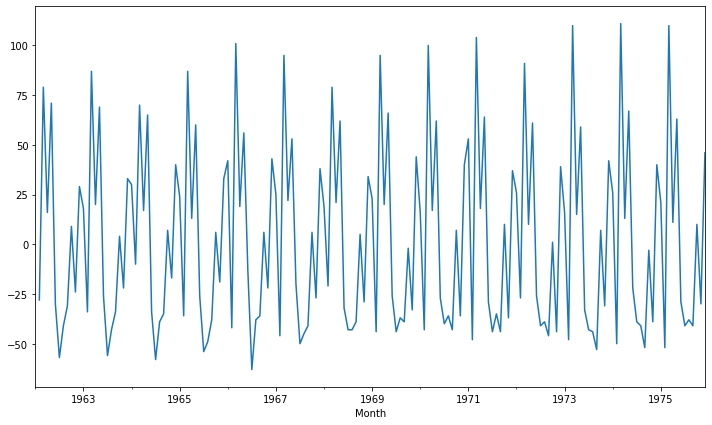

In [39]:
milk_df["First Diff"].plot(figsize=(12,7))

Mức chênh lệch theo mùa : 

In [40]:
milk_df["Seasonal Diff"] = milk_df["pound"] - milk_df["pound"].shift(12)
milk_df

,pound,12-month-rolling-std,12-month-rolling-mean,First Diff,Seasonal Diff
Month,,,,,
1962-01-01,589,NaN,NaN,NaN,NaN
1962-02-01,561,NaN,NaN,-28.0,NaN
1962-03-01,640,NaN,NaN,79.0,NaN
1962-04-01,656,NaN,NaN,16.0,NaN
1962-05-01,727,NaN,NaN,71.0,NaN
...,...,...,...,...,...
1975-08-01,858,61.848973,856.750000,-38.0,-9.0
1975-09-01,817,61.728818,856.916667,-41.0,2.0
1975-10-01,827,60.882649,858.166667,10.0,15.0


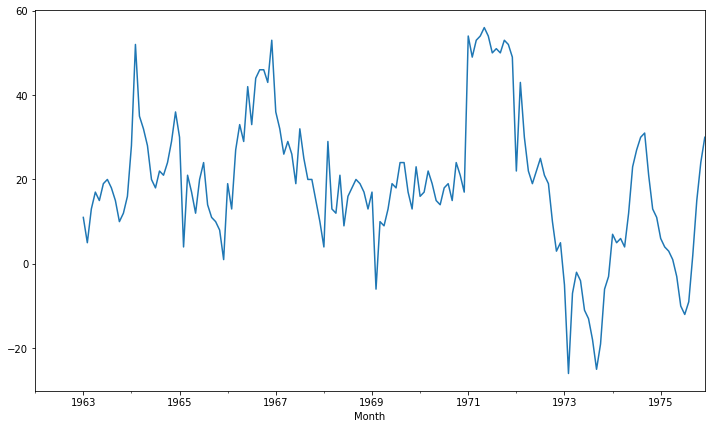

In [41]:
milk_df["Seasonal Diff"].plot(figsize=(12,7))

In [42]:
adf_check(milk_df["Seasonal Diff"].dropna(axis=0))

Kiểm định ADF: 
ADF Test statistic : -2.335419314359398
p-value : 0.1607988052771135
Độ trễ (lag) : 12
Số lượng quan sát : 143
Không đủ cơ sở để bác bỏ giả thuyết H0. Dữ liệu không có tính dừng


In [43]:
milk_df["Seasonal First Diff"] = milk_df["Seasonal Diff"] - milk_df["Seasonal Diff"].shift(1)

In [44]:
adf_check(milk_df["Seasonal First Diff"].dropna(axis=0) )

Kiểm định ADF: 
ADF Test statistic : -5.038002274921983
p-value : 1.865423431878848e-05
Độ trễ (lag) : 11
Số lượng quan sát : 143
Có đủ bằng chứng mạnh mẽ để bác bỏ giả thuyết H0. Dữ liệu có tính dừng


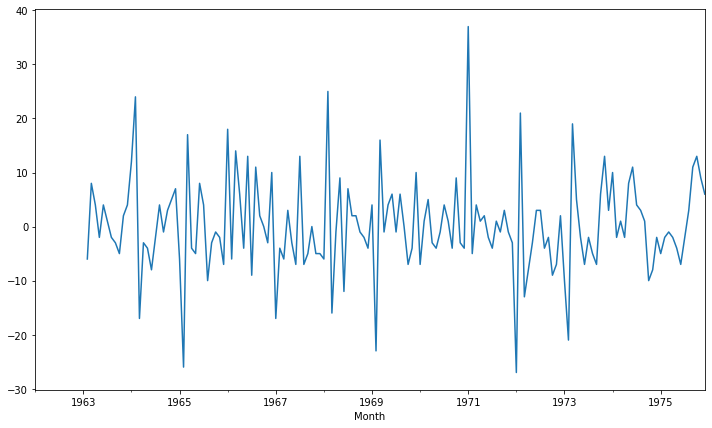

In [45]:
milk_df["Seasonal First Diff"].plot(figsize=(12,7))

### Tự tương quan 

Tự tương quan là hiện tượng mà sai số tại thời điểm t có mối quan hệ với sai số tại thời điểm t-1 hoặc tại bất kỳ thời điểm nào khác trong quá khứ.

Biểu đồ tự tương quan (còn được gọi là Biểu đồ tương quan) cho thấy mối tương quan của dữ liệu chuỗi thời gian với chính nó, độ trễ bởi t đơn vị thời gian. Vì vậy, trục y là tương quan và trục x là số đơn vị thời gian của độ trễ.

Việc diễn giải thực tế và cách nó liên quan đến mô hình ARIMA có thể hơi phức tạp, nhưng có một số phương pháp phổ biến mà chúng ta có thể sử dụng cho mô hình ARIMA. Ưu tiên chính ở đây là cố gắng tìm ra liệu chúng ta sẽ sử dụng các thành phần AR hay MA cho mô hình ARIMA (hoặc cả hai!) Cũng như chúng ta nên sử dụng bao nhiêu độ trễ. Nói chung, bạn sẽ sử dụng AR hoặc MA, việc sử dụng cả hai ít phổ biến hơn.

+ Nếu biểu đồ tự tương quan cho thấy tự tương quan dương ở độ trễ đầu tiên (độ trễ-1), thì nó gợi ý sử dụng các thuật ngữ AR liên quan đến độ trễ
+ Nếu biểu đồ tự tương quan cho thấy tự tương quan âm ở độ trễ đầu tiên, thì nó đề xuất sử dụng các thuật ngữ MA.

> 🔑**Lưu ý:** Ở đây chúng ta sẽ hiển thị việc chạy ACF và PACF trên nhiều tập dữ liệu khác nhau đã được tạo tĩnh theo những cách khác nhau, thông thường bạn sẽ chỉ chọn một tập dữ liệu tĩnh duy nhất và tiếp tục với điều đó.

Lý do chúng ta sử dụng hai kiểu hành vi ở đây là để cho bạn thấy khi nào nên sử dụng ACF và PACF.








In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

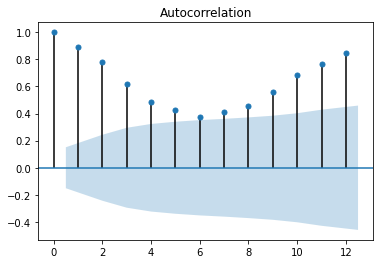

In [47]:
first_fig = plot_acf(milk_df["pound"],lags=12)

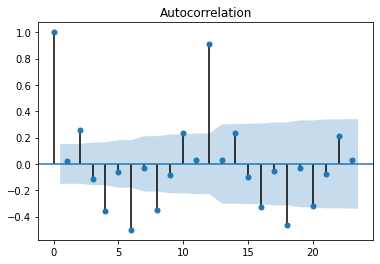

In [48]:
second_fig = plot_acf(milk_df["First Diff"].dropna())

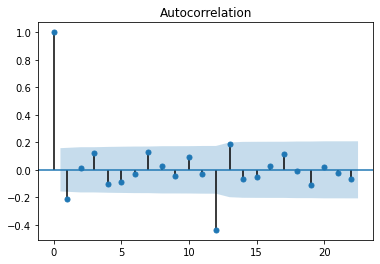

In [49]:
third_fig = plot_acf(milk_df["Seasonal First Diff"].dropna())

Pandas cũng có phương thức này được tích hợp sẵn, nhưng chỉ dành cho ACF, không có PACF. Vì vậy, khuyên bạn nên sử dụng mô hình thống kê, vì ACF và PACF là cốt lõi cho phương thức của nó hơn là phương thức từ pandas.


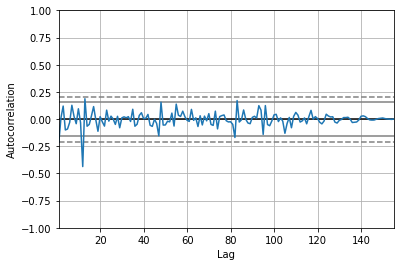

In [50]:
pd.plotting.autocorrelation_plot(milk_df["Seasonal First Diff"].dropna())

### Tự tương quan một phần

Nói chung, tương quan từng phần là tương quan có điều kiện. Đó là mối tương quan giữa hai biến theo giả định mà chúng ta biết và có tính đến các giá trị của một số tập biến khác.

Ví dụ: Xét bối cảnh hồi quy trong đó y = biến phản hồi và x1, x2 và x3 là các biến dự báo. Tương quan một phần giữa y và x3 là tương quan giữa các biến được xác định có tính đến cách cả y và x3 có liên quan với x1 và x2.

Về mặt hình thức, mối quan hệ này được định nghĩa là: 

### $\frac{\text{Covariance}(y, x_3|x_1, x_2)}{\sqrt{\text{Variance}(y|x_1, x_2)\text{Variance}(x_3| x_1, x_2)}}$






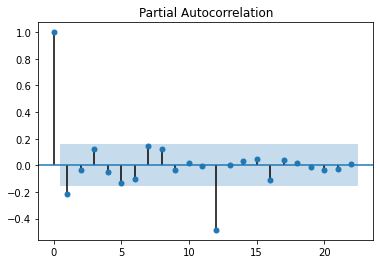

In [51]:
result = plot_pacf(milk_df["Seasonal First Diff"].dropna())

Điển hình là sự sụt giảm mạnh sau độ trễ "k" cho thấy nên sử dụng mô hình AR-k. Nếu có một sự suy giảm dần dần, nó gợi ý một mô hình MA.


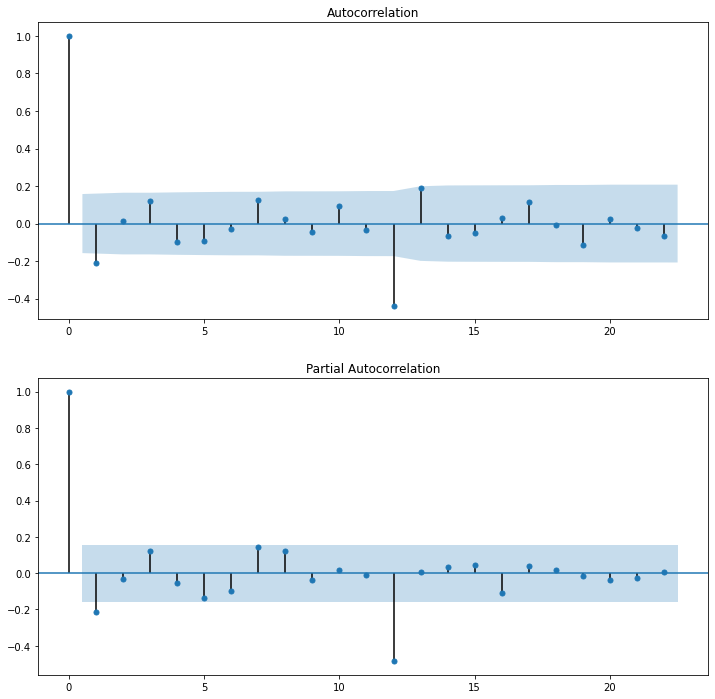

In [52]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,1,1)
ax1 = plot_acf(milk_df["Seasonal First Diff"].dropna(), ax=ax1)
ax2 = fig.add_subplot(2,1,2)
ax2 = plot_pacf(milk_df["Seasonal First Diff"].dropna(), ax=ax2)

### Sử dụng mô hình ARIMA theo mùa


In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [54]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes


> 🔑**Lưu ý** : các tham số p,d,q : 
> + p : Số lần quan sát độ trễ có trong mô hình.
> + d : Số lần các quan sát khác nhau, còn được gọi là mức độ sai khác.
> + q : Kích thước của cửa sổ đường trung bình động, còn được gọi là thứ tự của đường trung bình động.

 

In [55]:
model = sm.tsa.SARIMAX(milk_df["pound"],order=(0,1,0),seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              pound   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Sun, 03 Oct 2021   AIC                           1074.131
Time:                                    17:02:13   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

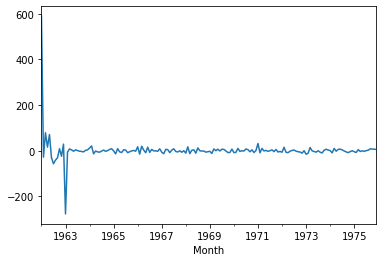

In [56]:
results.resid.plot()

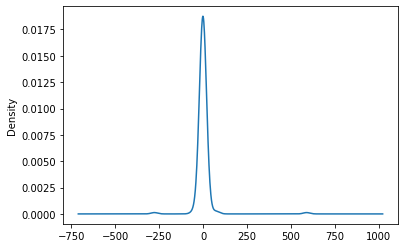

In [57]:
results.resid.plot(kind="kde")

### Dự đoán các giá trị tương lai


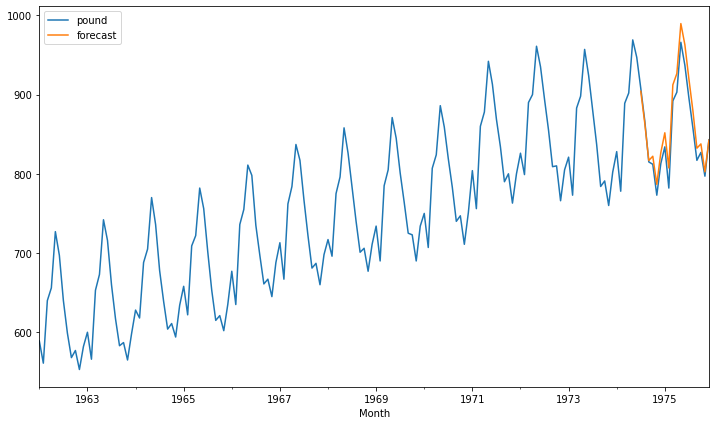

In [58]:
milk_df["forecast"] = results.predict(start=150, end=168, dynamic=True)
milk_df[["pound", "forecast"]].plot(figsize=(12,7))

Chúng ta sẽ tạo thêm khoảng thời gian mở rộng sau thời điểm cuối cùng của tập dữ liệu là ngày 01-12-1975

In [59]:
next_months = pd.date_range(milk_df.index[-1], periods=25, freq="MS")[1:]
next_months

DatetimeIndex(['1976-01-01', '1976-02-01', '1976-03-01', '1976-04-01',
               '1976-05-01', '1976-06-01', '1976-07-01', '1976-08-01',
               '1976-09-01', '1976-10-01', '1976-11-01', '1976-12-01',
               '1977-01-01', '1977-02-01', '1977-03-01', '1977-04-01',
               '1977-05-01', '1977-06-01', '1977-07-01', '1977-08-01',
               '1977-09-01', '1977-10-01', '1977-11-01', '1977-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [60]:
milk_next_months_df = pd.DataFrame(index=next_months, columns=milk_df.columns)
milk_next_months_df

,pound,12-month-rolling-std,12-month-rolling-mean,First Diff,Seasonal Diff,Seasonal First Diff,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
future_df = pd.concat([milk_df, milk_next_months_df], axis=1)
future_df

,pound,12-month-rolling-std,12-month-rolling-mean,First Diff,Seasonal Diff,Seasonal First Diff,forecast,pound,12-month-rolling-std,12-month-rolling-mean,First Diff,Seasonal Diff,Seasonal First Diff,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,NaN,NaN,-28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-01,640.0,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-01,656.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-01,727.0,NaN,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
future_df["forecast"] = results.predict(start=150, 
                end=250,
                dynamic=True)

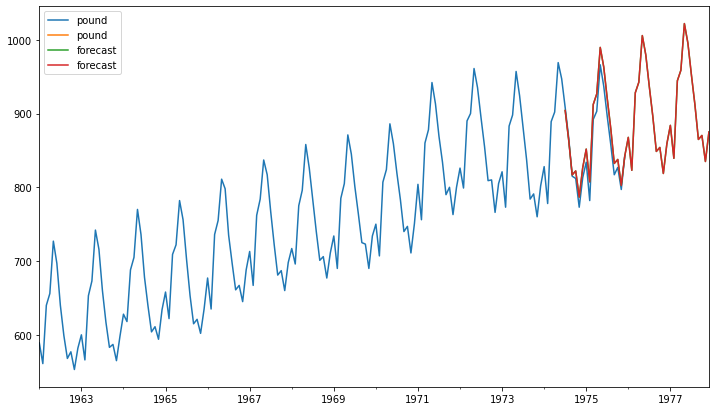

In [64]:
future_df[["pound", "forecast"]].plot(figsize=(12,7))

Không tệ! Thực tế, khá tuyệt! Hy vọng điều này sẽ giúp bạn thấy tiềm năng của các mô hình ARIMA, rất tiếc là rất nhiều dữ liệu tài chính sẽ không tuân theo loại hành vi này, nó thường sẽ tuân theo một cái gì đó chỉ ra chuyển động `brown`, sẽ được đề cập trong phần tiếp theo